# Machine Learning Model for Google Stock Prices using Yfinance(Yahoo Finance)

## Linear Regression Model

### Importing Modules

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
today = datetime.today().date()
yesterday = today - timedelta(days=1)

### Get Historical Data using yfinance

In [3]:
ticker_symbol = "GOOGL"
google_stock = yf.Ticker(ticker_symbol)

historical_data = google_stock.history(period="max")

In [4]:
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,132.089996,18324800,0.0,0.0
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,133.619995,32395200,0.0,0.0
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,134.619995,23861500,0.0,0.0


### Drop last two columns

In [5]:
historical_data.drop(columns=['Stock Splits'], inplace=True)
historical_data.drop(columns=['Dividends'], inplace=True)

In [6]:
historical_data['High']

Date
2004-08-19 00:00:00-04:00      2.604104
2004-08-20 00:00:00-04:00      2.729730
2004-08-23 00:00:00-04:00      2.839840
2004-08-24 00:00:00-04:00      2.792793
2004-08-25 00:00:00-04:00      2.702703
                                ...    
2023-11-13 00:00:00-05:00    132.589996
2023-11-14 00:00:00-05:00    135.699997
2023-11-15 00:00:00-05:00    135.029999
2023-11-16 00:00:00-05:00    137.220001
2023-11-17 00:00:00-05:00    136.059998
Name: High, Length: 4847, dtype: float64

### Plot Entire Data, Date vs Closing Price

Text(0.5, 1.0, 'Closing Prices of Google Stock from 2004 to 2023')

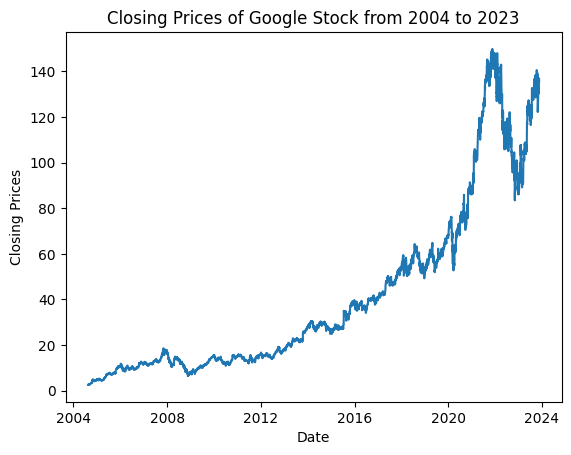

In [79]:
plt.plot(historical_data.index, historical_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Closing Prices of Google Stock from 2004 to 2023')

In [8]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4847 entries, 2004-08-19 00:00:00-04:00 to 2023-11-17 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4847 non-null   float64
 1   High    4847 non-null   float64
 2   Low     4847 non-null   float64
 3   Close   4847 non-null   float64
 4   Volume  4847 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 227.2 KB


### Get Stock data upto 2022-11-14

In [9]:
stock_data = yf.Ticker(ticker_symbol).history(start='2004-08-19', end='2022-11-14')

stock_data.drop(columns=['Stock Splits'], inplace=True)
stock_data.drop(columns=['Dividends'], inplace=True)

In [10]:
stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...
2022-11-07 00:00:00-05:00,87.279999,88.900002,86.849998,88.489998,34078900
2022-11-08 00:00:00-05:00,88.900002,90.320000,87.589996,88.900002,30429000
2022-11-09 00:00:00-05:00,88.449997,89.440002,87.279999,87.320000,31769100


### Make X variable as Features and y as Target

In [11]:
X = stock_data[['Open', 'High', 'Low', 'Volume']]
X

,Open,High,Low,Volume
Date,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,893181924
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,456686856
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,365122512
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,304946748
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,183772044
...,...,...,...,...
2022-11-07 00:00:00-05:00,87.279999,88.900002,86.849998,34078900
2022-11-08 00:00:00-05:00,88.900002,90.320000,87.589996,30429000
2022-11-09 00:00:00-05:00,88.449997,89.440002,87.279999,31769100


In [12]:
y = stock_data['Close']
y

Date
2004-08-19 00:00:00-04:00     2.511011
2004-08-20 00:00:00-04:00     2.710460
2004-08-23 00:00:00-04:00     2.737738
2004-08-24 00:00:00-04:00     2.624374
2004-08-25 00:00:00-04:00     2.652653
                               ...    
2022-11-07 00:00:00-05:00    88.489998
2022-11-08 00:00:00-05:00    88.900002
2022-11-09 00:00:00-05:00    87.320000
2022-11-10 00:00:00-05:00    93.940002
2022-11-11 00:00:00-05:00    96.410004
Name: Close, Length: 4592, dtype: float64

### Use sklearn to split data in Train and Test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
Open      0
High      0
Low       0
Volume    0
dtype: int64


### Split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train

,Open,High,Low,Volume
Date,,,,
2010-03-16 00:00:00-04:00,14.059810,14.224725,14.033033,137122740
2011-07-12 00:00:00-04:00,13.217217,13.498999,13.163163,113534352
2022-04-01 00:00:00-04:00,139.500000,140.470993,138.307495,25942000
2019-03-29 00:00:00-04:00,59.008999,59.198502,58.319000,30890000
2008-09-15 00:00:00-04:00,10.610611,11.060310,10.603353,262433304
...,...,...,...,...
2022-03-18 00:00:00-04:00,133.424500,136.244003,132.258499,44566000
2006-06-26 00:00:00-04:00,10.178929,10.217718,10.091341,141905952
2016-11-29 00:00:00-05:00,39.418999,39.821999,39.266998,31240000


In [17]:
X_test

,Open,High,Low,Volume
Date,,,,
2017-05-08 00:00:00-04:00,47.372501,48.049500,47.369999,37534000
2015-10-30 00:00:00-04:00,37.278000,37.315498,36.826500,39984000
2011-01-19 00:00:00-05:00,16.069069,16.090090,15.757257,136107756
2015-05-06 00:00:00-04:00,27.132000,27.196501,26.612000,39034000
2020-11-02 00:00:00-05:00,81.177002,82.912003,80.711998,44228000
...,...,...,...,...
2018-11-28 00:00:00-05:00,52.873001,54.643002,52.147499,46042000
2007-03-12 00:00:00-04:00,11.325576,11.392643,11.289039,138477384
2015-05-19 00:00:00-04:00,27.400000,27.670000,27.356001,47126000


In [18]:
y_train

Date
2010-03-16 00:00:00-04:00     14.144144
2011-07-12 00:00:00-04:00     13.363614
2022-04-01 00:00:00-04:00    140.150497
2019-03-29 00:00:00-04:00     58.844501
2008-09-15 00:00:00-04:00     10.857357
                                ...    
2022-03-18 00:00:00-04:00    136.125504
2006-06-26 00:00:00-04:00     10.115616
2016-11-29 00:00:00-05:00     39.472000
2019-08-14 00:00:00-04:00     58.212502
2008-01-18 00:00:00-05:00     15.021271
Name: Close, Length: 3673, dtype: float64

In [19]:
y_test

Date
2017-05-08 00:00:00-04:00    47.934502
2015-10-30 00:00:00-04:00    36.869499
2011-01-19 00:00:00-05:00    15.809560
2015-05-06 00:00:00-04:00    26.754000
2020-11-02 00:00:00-05:00    81.216003
                               ...    
2018-11-28 00:00:00-05:00    54.589500
2007-03-12 00:00:00-04:00    11.380130
2015-05-19 00:00:00-04:00    27.464001
2010-07-14 00:00:00-04:00    12.295796
2013-09-11 00:00:00-04:00    22.427177
Name: Close, Length: 919, dtype: float64

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3673, 4)
X_test shape: (919, 4)
y_train shape: (3673,)
y_test shape: (919,)


### Import LinearRegression model from sklearn for training and mean_squared_error for evaluation

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Train the Model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions on the test set

In [23]:
predictions = model.predict(X_test)

In [24]:
predictions

array([ 47.94829201,  36.95250986,  15.83620786,  26.76586643,
        82.24560712,   2.97561325,  89.00990459,  15.65198499,
        11.78696636,  21.96305816,  18.25475304,  36.63004912,
        11.008147  ,  11.62466982,  60.35398142,  13.63073008,
         2.98581164,  27.84181534,  43.51400936,  11.47413586,
        21.81542963,  39.92648334,  57.06108393,   3.43277497,
        14.41366483,  21.65668542,  81.44192597,   8.79160639,
        12.40000969,  13.29997474,  25.78175593, 145.55860031,
        74.40166608,  41.14400229,  60.25588842,  11.56497277,
        29.81336357,  70.92072774,  11.55785237,   6.98677252,
         7.73002201,   4.48067146,  25.74520872,  58.2392823 ,
        11.5470053 ,  38.18723618, 141.18789349,   8.37024905,
       114.95112886,   4.65835585,  28.05637918,  57.43257158,
        10.10799302,  11.97534566,  12.98242049, 101.88850218,
        19.71911938,  55.01211206,   8.40972986,   7.22443433,
        14.9657294 ,  61.20400028, 136.41190688,  12.99

### Plot Graph for Predictions and Actual Closing Prices

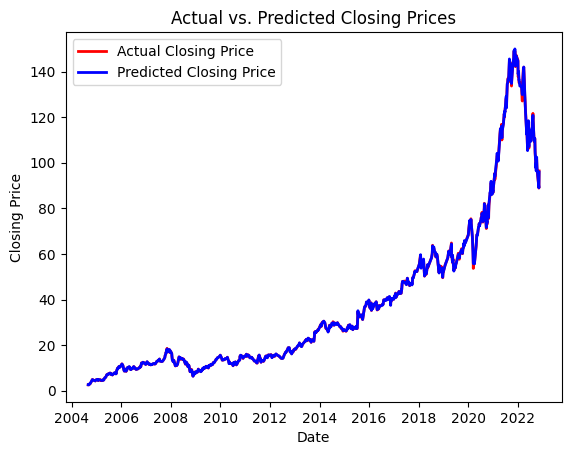

In [25]:
sorted_indices = y_test.index.argsort()

plt.plot(y_test.index[sorted_indices], y_test.values[sorted_indices], label='Actual Closing Price', color='red', linewidth=2)
plt.plot(y_test.index[sorted_indices], predictions[sorted_indices], label='Predicted Closing Price', color='blue', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")

plt.legend()

plt.show()

### Evaluate model with MSE and RMSE

In [26]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error : {rmse}")


Model Evaluation:
Mean Squared Error: 0.11200727150172445
Root Mean Squared Error : 0.33467487432092125


## Get new stock data from 2022-11-15 to 2023-11-14

In [27]:
new_stock_data = yf.Ticker(ticker_symbol).history(start='2022-11-15', end=today)

In [28]:
new_stock_data.drop(columns=['Stock Splits'], inplace=True)
new_stock_data.drop(columns=['Dividends'], inplace=True)

In [29]:
new_stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-15 00:00:00-05:00,98.260002,100.139999,96.709999,98.440002,41640800
2022-11-16 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200
2022-11-17 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600
2022-11-18 00:00:00-05:00,98.769997,98.900002,96.370003,97.430000,28342300
2022-11-21 00:00:00-05:00,97.290001,98.400002,95.360001,95.599998,21647400
...,...,...,...,...,...
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,132.089996,18324800
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,133.619995,32395200
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,134.619995,23861500


### Split the data into Features and Target for new_stock_data

In [30]:
X_new = new_stock_data[['Open', 'High', 'Low', 'Volume']]
y_new = new_stock_data['Close']

In [31]:
X_new

,Open,High,Low,Volume
Date,,,,
2022-11-15 00:00:00-05:00,98.260002,100.139999,96.709999,41640800
2022-11-16 00:00:00-05:00,97.900002,99.639999,97.639999,29105200
2022-11-17 00:00:00-05:00,96.970001,99.279999,96.790001,26052600
2022-11-18 00:00:00-05:00,98.769997,98.900002,96.370003,28342300
2022-11-21 00:00:00-05:00,97.290001,98.400002,95.360001,21647400
...,...,...,...,...
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,18324800
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,32395200
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,23861500


In [32]:
y_new

Date
2022-11-15 00:00:00-05:00     98.440002
2022-11-16 00:00:00-05:00     98.849998
2022-11-17 00:00:00-05:00     98.360001
2022-11-18 00:00:00-05:00     97.430000
2022-11-21 00:00:00-05:00     95.599998
                                ...    
2023-11-13 00:00:00-05:00    132.089996
2023-11-14 00:00:00-05:00    133.619995
2023-11-15 00:00:00-05:00    134.619995
2023-11-16 00:00:00-05:00    136.929993
2023-11-17 00:00:00-05:00    135.309998
Name: Close, Length: 254, dtype: float64

### Make new predictions on new stock data

In [33]:
new_prediction = model.predict(X_new)

In [34]:
new_prediction

array([ 98.54886939,  99.15278473,  98.75323633,  96.92379899,
        96.63371415,  95.44836517,  98.50261269,  97.91707278,
        96.33740263,  94.74574453,  99.60186391, 101.43294368,
       100.37900276, 100.73195138,  97.33784568,  95.4327919 ,
        93.98183347,  93.36764617,  92.5333377 ,  96.97280943,
        95.27441193,  90.9885072 ,  90.2374723 ,  88.84022915,
        88.46938492,  89.42167694,  86.97976072,  89.11085843,
        87.46644196,  87.02138138,  88.47468691,  87.75964303,
        89.93342031,  88.06945123,  86.28707945,  85.95728013,
        89.36643893,  88.09191188,  91.05703791,  90.40161312,
        91.38889633,  90.58507631,  91.47402456,  93.04744496,
        97.69067187,  99.32904815,  98.63074376,  94.58982778,
        96.48775598,  99.81384431,  97.28999954,  98.51759149,
        99.83863376, 107.36809822, 106.66703062, 103.61700345,
       107.23118016,  99.64191429,  94.75545251,  95.55774481,
        94.4141391 ,  93.00998985,  96.39888097,  96.77

### Plot graph for new prediction

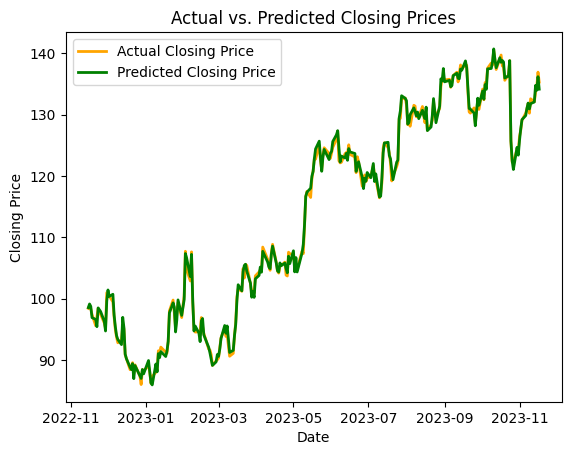

In [35]:
sorted_indices = np.argsort(y_new.index)

plt.plot(y_new.index[sorted_indices], y_new.values[sorted_indices], label='Actual Closing Price', color='orange', linewidth=2)
plt.plot(y_new.index[sorted_indices], new_prediction[sorted_indices], label='Predicted Closing Price', color='green', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.legend()
plt.show()

### Evaluate model using new predictions on new stock data

In [36]:
new_mse = mean_squared_error(y_new, new_prediction)
new_rmse = np.sqrt(new_mse)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {new_mse}")
print(f"Root Mean Squared Error : {new_rmse}")


Model Evaluation:
Mean Squared Error: 0.49637899317110706
Root Mean Squared Error : 0.704541690158295


## Random Forest Regressor Model

### Import the model

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

### Train the model

In [39]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Make predictions

In [40]:
rfr_predictions = rfr_model.predict(X_test)

In [41]:
rfr_predictions

array([ 47.85701981,  37.20391003,  15.91730503,  26.96494484,
        81.93035767,   2.96519789,  88.22681953,  15.61869118,
        11.76981467,  21.92082645,  18.40622644,  36.49302532,
        11.02668921,  11.6002826 ,  60.24013031,  13.46829561,
         2.97627651,  27.94620916,  43.58581459,  11.53732233,
        21.84565615,  40.02557026,  57.20298931,   3.43026544,
        14.47164159,  21.55299536,  80.98861885,   8.7628406 ,
        12.40337873,  13.32953208,  25.74752731, 143.92455444,
        73.94748497,  41.14906467,  60.14673931,  11.58248756,
        30.13593649,  71.51952614,  11.57861107,   6.97917173,
         7.72113862,   4.45496999,  25.63505463,  58.22725014,
        11.55791533,  38.05459499, 141.41372223,   8.13873862,
       114.05241409,   4.62753742,  28.15963554,  57.37270046,
        10.0995844 ,  11.90285544,  12.99144891, 102.15211037,
        19.86596842,  54.79279415,   8.54695948,   7.22688951,
        14.94315316,  61.01376511, 136.33732971,  13.10

In [42]:
y_test

Date
2017-05-08 00:00:00-04:00    47.934502
2015-10-30 00:00:00-04:00    36.869499
2011-01-19 00:00:00-05:00    15.809560
2015-05-06 00:00:00-04:00    26.754000
2020-11-02 00:00:00-05:00    81.216003
                               ...    
2018-11-28 00:00:00-05:00    54.589500
2007-03-12 00:00:00-04:00    11.380130
2015-05-19 00:00:00-04:00    27.464001
2010-07-14 00:00:00-04:00    12.295796
2013-09-11 00:00:00-04:00    22.427177
Name: Close, Length: 919, dtype: float64

### Plot the graph of Actual and Predicted Values

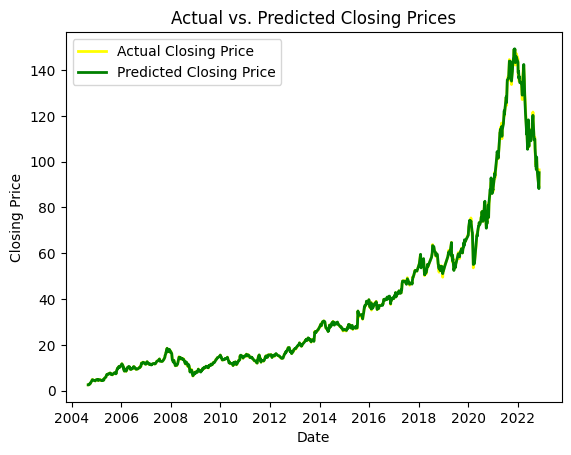

In [43]:
sorted_indices = y_test.index.argsort()

plt.plot(y_test.index[sorted_indices], y_test.values[sorted_indices], label='Actual Closing Price', color='yellow', linewidth=2)
plt.plot(y_test.index[sorted_indices], rfr_predictions[sorted_indices], label='Predicted Closing Price', color='green', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")

plt.legend()

plt.show()

### Evaluate model

In [44]:
rfr_mse = mean_squared_error(y_test, rfr_predictions)
print('Mean Squared Error : ',rfr_mse)
rfr_rmse = np.sqrt(rfr_mse)
print('Root Mean Squared Error : ',rfr_rmse)


Mean Squared Error :  0.19579166564683834
Root Mean Squared Error :  0.44248352019802767


### Make new predictions on new data

In [45]:
rfr_new_predictions = rfr_model.predict(X_new)
print(rfr_new_predictions)

[ 98.0048188   98.29669914  97.20729958  96.86955948  96.33007973
  95.43764977  96.92405998  97.41499931  95.86241058  94.79373543
  98.31814384 101.6038253   99.16649956 100.32928993  97.38619881
  95.54537529  94.78910461  94.52788086  93.56069138  97.85817879
  95.23908951  91.29440872  90.70386436  89.34325882  88.37229858
  89.24545441  87.768965    88.62181908  87.8064296   87.06393036
  88.53277977  87.54824425  89.32167885  88.08359985  86.82687004
  86.53782051  88.57842461  87.82523544  90.91734833  91.24700874
  91.12421455  91.29567856  91.35661461  91.27770981  95.49759491
  98.41111877  98.2194989   94.71973396  95.79953079  98.24119881
  96.49961937  96.72666016  99.81166862 106.61154984 105.39118553
 103.45445    105.25650024 100.14132378  97.15277344  94.83890335
  94.48925949  94.2721257   94.91775391  95.40773018  94.78508957
  93.38161102  91.35204964  91.25415306  89.59216484  90.49593857
  90.55629379  90.54606857  91.09950798  94.37375099  94.74991508
  94.75595

### Plot the graph and evaluate

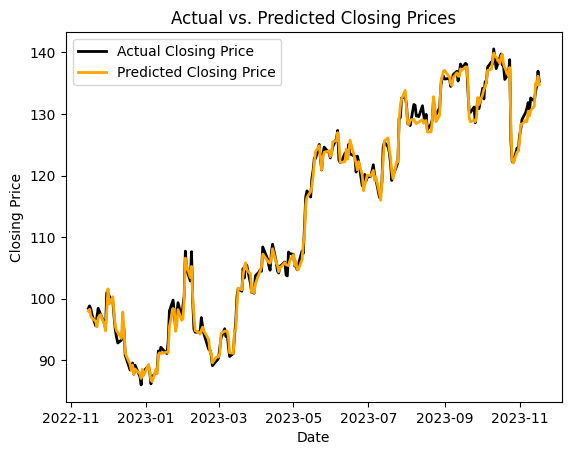

In [46]:
sorted_indices = np.argsort(y_new.index)

plt.plot(y_new.index[sorted_indices], y_new.values[sorted_indices], label='Actual Closing Price', color='black', linewidth=2)
plt.plot(y_new.index[sorted_indices], rfr_new_predictions[sorted_indices], label='Predicted Closing Price', color='orange', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.legend()
plt.show()

In [47]:
new_rfr_mse = mean_squared_error(y_new, rfr_new_predictions)
print('Mean Squared Error : ',new_rfr_mse)
new_rfr_rmse = np.sqrt(new_rfr_mse)
print('Root Mean Squared Error : ',new_rfr_rmse)

Mean Squared Error :  1.0747022718964563
Root Mean Squared Error :  1.0366784804829587


## Random Forest Classifier Model

### Import model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
rfc_data = yf.Ticker(ticker_symbol).history(start='2004-08-19', end='2022-11-14')

rfc_data.drop(columns=['Stock Splits'], inplace=True)
rfc_data.drop(columns=['Dividends'], inplace=True)

In [51]:
rfc_data

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...
2022-11-07 00:00:00-05:00,87.279999,88.900002,86.849998,88.489998,34078900
2022-11-08 00:00:00-05:00,88.900002,90.320000,87.589996,88.900002,30429000
2022-11-09 00:00:00-05:00,88.449997,89.440002,87.279999,87.320000,31769100


### Make a new column for tomorrow's closing price

In [52]:
rfc_data["Tomorrow"] = rfc_data["Close"].shift(-1)

In [53]:
rfc_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,2.710460
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,2.737738
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,2.624374
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,2.652653
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,2.700450
...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,87.279999,88.900002,86.849998,88.489998,34078900,88.900002
2022-11-08 00:00:00-05:00,88.900002,90.320000,87.589996,88.900002,30429000,87.320000
2022-11-09 00:00:00-05:00,88.449997,89.440002,87.279999,87.320000,31769100,93.940002


### Make a new column Target to show if closing price is higher(1) or lower(0) than previous day

In [54]:
rfc_data["Target"] = (rfc_data["Tomorrow"]>rfc_data["Close"]).astype(int)

In [55]:
rfc_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,2.710460,1
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,2.737738,1
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,2.624374,0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,2.652653,1
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,2.700450,1
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,87.279999,88.900002,86.849998,88.489998,34078900,88.900002,1
2022-11-08 00:00:00-05:00,88.900002,90.320000,87.589996,88.900002,30429000,87.320000,0
2022-11-09 00:00:00-05:00,88.449997,89.440002,87.279999,87.320000,31769100,93.940002,1


### Split data into training and test and train the model to predict the price movement high(1) or low(0)

In [56]:
rfc_features = rfc_data[['Open', 'High', 'Low', 'Close', 'Volume']]
rfc_target = rfc_data['Target'].values.ravel()

In [57]:
rfc_X_train, rfc_X_test, rfc_y_train, rfc_y_test = train_test_split(rfc_features, rfc_target, test_size=0.2, random_state=42 )

In [58]:
rfc_model.fit(rfc_X_train, rfc_y_train)

RandomForestClassifier(random_state=42)

### Make predictions and plot graph and Evaluate

In [59]:
rfc_predictions = rfc_model.predict(rfc_X_test)

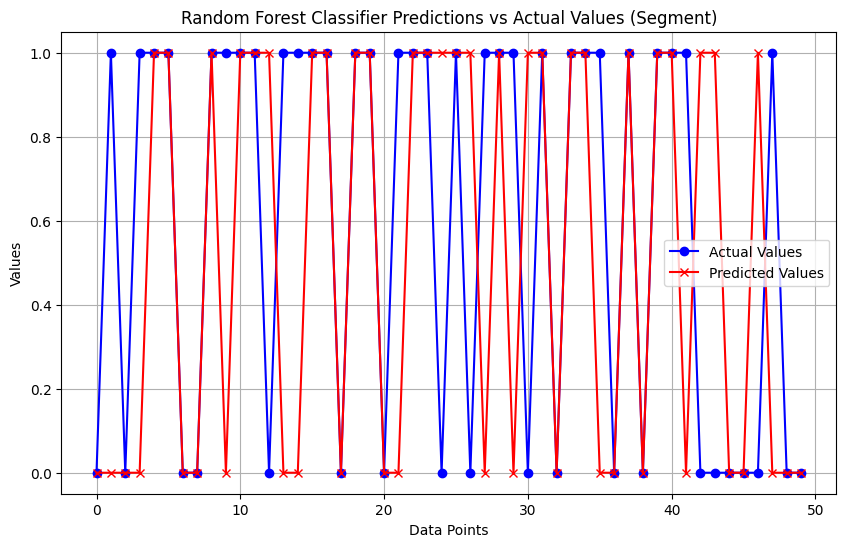

In [60]:
segment_length = 50
rfc_y_test_segment = rfc_y_test[:segment_length]
rfc_predictions_segment = rfc_predictions[:segment_length]

plt.figure(figsize=(10, 6))

plt.plot(rfc_y_test_segment, marker='o', label='Actual Values', color='blue')
plt.plot(rfc_predictions_segment, marker='x', label='Predicted Values', color='red')

plt.title('Random Forest Classifier Predictions vs Actual Values (Segment)')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

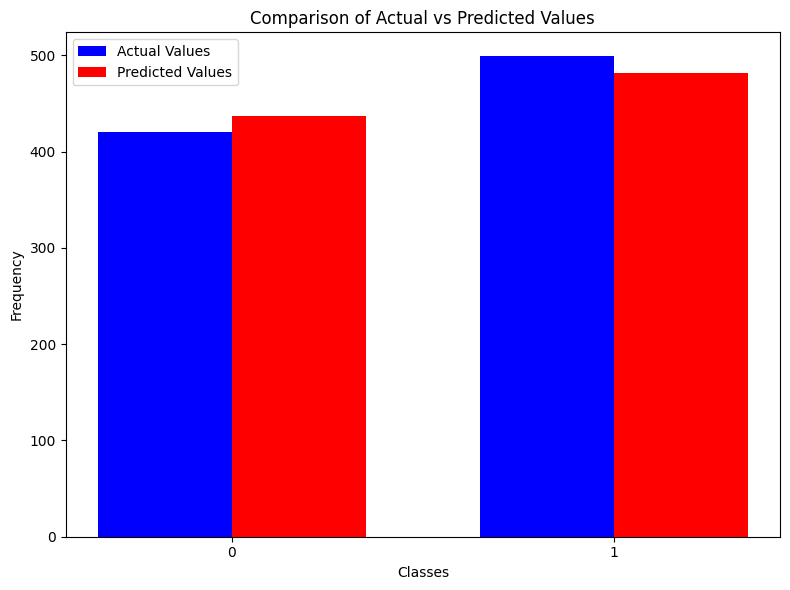

In [61]:
unique, counts_pred = np.unique(rfc_predictions, return_counts=True)
unique, counts_test = np.unique(rfc_y_test, return_counts=True)

plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(unique))

plt.bar(index, counts_test, bar_width, label='Actual Values', color='blue')
plt.bar(index + bar_width, counts_pred, bar_width, label='Predicted Values', color='red')

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Comparison of Actual vs Predicted Values')
plt.xticks(index + bar_width / 2, unique)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
accu_score = accuracy_score(rfc_y_test, rfc_predictions)
report = classification_report(rfc_y_test, rfc_predictions)

### On test set we get around 52.8% accuracy

In [63]:
print('Accuracy : ',accu_score)
print('Report \n',report)

Accuracy :  0.528835690968444
Report 
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       420
           1       0.57      0.55      0.56       499

    accuracy                           0.53       919
   macro avg       0.53      0.53      0.53       919
weighted avg       0.53      0.53      0.53       919



### Get new data and make predictions, plot graph, evaluate

In [64]:
new_rfc_data = yf.Ticker(ticker_symbol).history(start='2022-11-15', end=today)

new_rfc_data.drop(columns=['Stock Splits'], inplace=True)
new_rfc_data.drop(columns=['Dividends'], inplace=True)


In [65]:
new_rfc_data

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-15 00:00:00-05:00,98.260002,100.139999,96.709999,98.440002,41640800
2022-11-16 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200
2022-11-17 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600
2022-11-18 00:00:00-05:00,98.769997,98.900002,96.370003,97.430000,28342300
2022-11-21 00:00:00-05:00,97.290001,98.400002,95.360001,95.599998,21647400
...,...,...,...,...,...
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,132.089996,18324800
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,133.619995,32395200
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,134.619995,23861500


In [66]:
new_rfc_data["Tomorrow"] = new_rfc_data["Close"].shift(-1)

In [67]:
new_rfc_data["Target"] = (new_rfc_data["Tomorrow"]>new_rfc_data["Close"]).astype(int)

In [68]:
new_rfc_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2022-11-15 00:00:00-05:00,98.260002,100.139999,96.709999,98.440002,41640800,98.849998,1
2022-11-16 00:00:00-05:00,97.900002,99.639999,97.639999,98.849998,29105200,98.360001,0
2022-11-17 00:00:00-05:00,96.970001,99.279999,96.790001,98.360001,26052600,97.430000,0
2022-11-18 00:00:00-05:00,98.769997,98.900002,96.370003,97.430000,28342300,95.599998,0
2022-11-21 00:00:00-05:00,97.290001,98.400002,95.360001,95.599998,21647400,97.050003,1
...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,132.089996,18324800,133.619995,1
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,133.619995,32395200,134.619995,1
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,134.619995,23861500,136.929993,1


In [69]:
new_rfc_features = new_rfc_data[['Open', 'High', 'Low', 'Close', 'Volume']]
new_rfc_target = new_rfc_data['Target'].values.ravel()

In [70]:
new_rfc_predictions = rfc_model.predict(new_rfc_features)

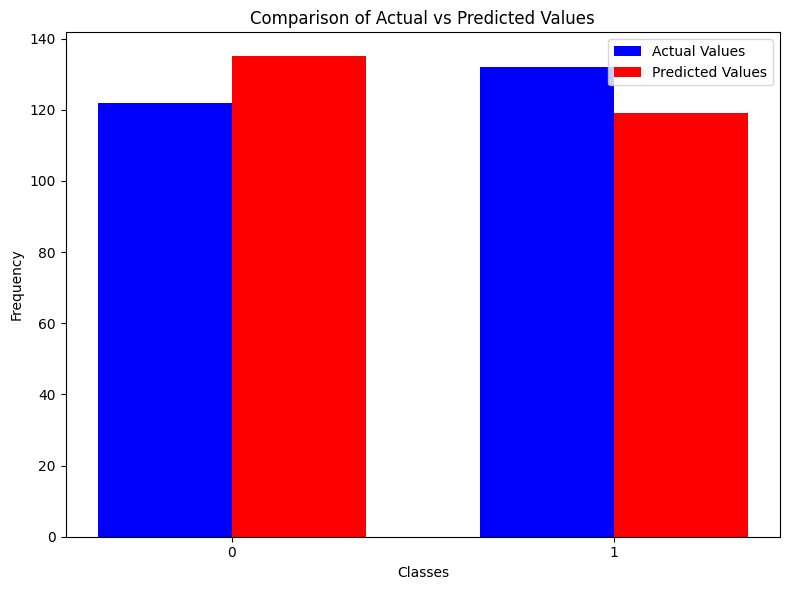

In [71]:
unique, counts_pred = np.unique(new_rfc_predictions, return_counts=True)
unique, counts_test = np.unique(new_rfc_target, return_counts=True)

plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(unique))

plt.bar(index, counts_test, bar_width, label='Actual Values', color='blue')
plt.bar(index + bar_width, counts_pred, bar_width, label='Predicted Values', color='red')

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Comparison of Actual vs Predicted Values')
plt.xticks(index + bar_width / 2, unique)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
new_accu_score = accuracy_score(new_rfc_target, new_rfc_predictions)
new_report = classification_report(new_rfc_target, new_rfc_predictions)

### On new data we get around 47.4% accuracy 

In [73]:
print('Accuracy : ',new_accu_score)
print('Report \n',new_report)

Accuracy :  0.4763779527559055
Report 
               precision    recall  f1-score   support

           0       0.46      0.51      0.48       122
           1       0.50      0.45      0.47       132

    accuracy                           0.48       254
   macro avg       0.48      0.48      0.48       254
weighted avg       0.48      0.48      0.48       254



### Predicting movement of todays closing price

In [74]:
yf.Ticker(ticker_symbol).history().tail().drop(columns=['Dividends', 'Stock Splits'])

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-13 00:00:00-05:00,131.779999,132.589996,131.250000,132.089996,18324800
2023-11-14 00:00:00-05:00,134.190002,135.699997,133.320007,133.619995,32395200
2023-11-15 00:00:00-05:00,134.869995,135.029999,133.570007,134.619995,23861500
2023-11-16 00:00:00-05:00,135.190002,137.220001,134.320007,136.929993,28013200
2023-11-17 00:00:00-05:00,136.000000,136.059998,133.649994,135.309998,37240600


In [75]:
upto_today_data = yf.Ticker(ticker_symbol).history(start=today).drop(columns=['Dividends', 'Stock Splits'])

In [76]:
upto_today_data

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-17 00:00:00-05:00,136.0,136.054993,133.654999,135.309998,35737273


In [77]:
move_predictions = rfc_model.predict(upto_today_data)

In [78]:
if move_predictions==1:
    print(f"The Closing Price on {today} might be higher than {yesterday}")
else:
    print(f"The Closing Price on {today} might be lower than {yesterday} ")
    

The Closing Price on 2023-11-18 might be higher than 2023-11-17
